# Pandas and Astropy Tables

## Exploring Astropy Tables

In [39]:
from astropy.table import Table

filename = 'coma_z_results.fits'
coma_results = Table.read(filename)

### Selecting rows and columns

In [40]:
coma_results.info()

<Table length=10564>
name  dtype 
---- -------
  ra float64
 dec float64
   z float64


In [41]:
coma_results.colnames

['ra', 'dec', 'z']

In [42]:
# Extract a column
coma_results['z'][:5]

1.397845e-05
0.001047743
0.004035818
4.640485e-05
8.034911e-05


In [43]:
type(coma_results['z'])

astropy.table.column.Column

In [44]:
# Extract a row
coma_results[0]

ra,dec,z
float64,float64,float64
187.89891,35.172864,1.397845e-05


In [45]:
type(coma_results[0])

astropy.table.row.Row

In [46]:
# Extract an element

coma_results['ra'][0]

np.float64(187.89891)

In [47]:
coma_results[0]['ra']

np.float64(187.89891)

### Plotting

To see what the results look like, we will use a scatter plot.  The
library we will use is [Matplotlib](https://matplotlib.org/), which is
the most widely-used plotting library for Python.
The Matplotlib interface is based on MATLAB (hence the name), so if
you know MATLAB, some of it will be familiar.

We will import like this:

```python
import matplotlib.pyplot as plt
```

Pyplot is part of the Matplotlib library.  It is conventional to
import it using the shortened name `plt`.


Pyplot provides two functions that can make scatter plots,
[plt.scatter](https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.scatter.html)
and
[plt.plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html).

- `scatter` is more versatile; for example, you can make every point
  in a scatter plot a different color.

- `plot` is more limited, but for simple cases, it can be
  substantially faster.

Jake Vanderplas explains these differences in [The Python Data Science
Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html).

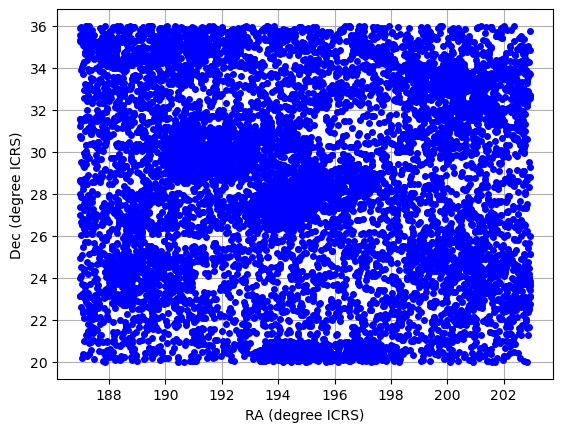

In [48]:
import matplotlib.pyplot as plt

x = coma_results['ra']
y = coma_results['dec']
plt.plot(x, y, 'bo', ms=4)

plt.xlabel('RA (degree ICRS)')
plt.ylabel('Dec (degree ICRS)')
plt.grid()

#### Exercise

In the call to plt.plot, use the keyword argument markersize to make the markers smaller.

Then add the keyword argument alpha to make the markers partly transparent.

Adjust these arguments until you think the figure shows the data most clearly.

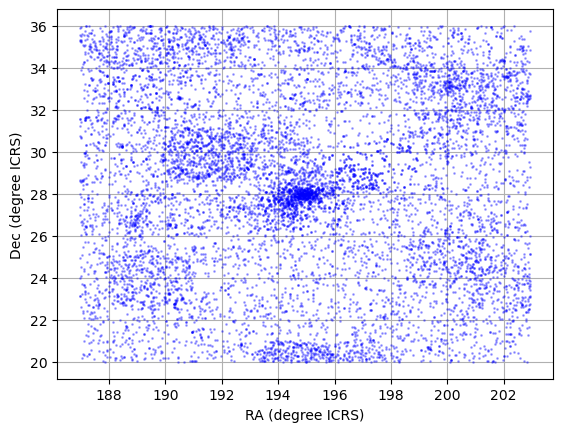

In [49]:
import matplotlib.pyplot as plt

x = coma_results['ra']
y = coma_results['dec']
plt.plot(x, y, 'bo', ms=1, alpha=0.3)

plt.xlabel('RA (degree ICRS)')
plt.ylabel('Dec (degree ICRS)')
plt.grid()

## Pandas dataframes

Two common choices are the Pandas DataFrame and Astropy Table. Pandas DataFrames and Astropy Tables share many of the same characteristics and most of the manipulations that we do can be done with either. As you become more familiar with each, you will develop a sense of which one you prefer for different tasks. For instance you may choose to use Astropy Tables to read in data, especially astronomy specific data formats, but Pandas DataFrames to inspect the data. Fortunately, Astropy makes it easy to convert between the two data types. We will choose to use Pandas DataFrame, for two reasons:

    1. It provides capabilities that are (almost) a superset of the other data structures, so it is the all-in-one solution.

    2. Pandas is a general-purpose tool that is useful in many domains, especially data science. If you are going to develop expertise in one tool, Pandas is a good choice.

However, compared to an Astropy Table, Pandas has one big drawback: it does not keep the metadata associated with the table, including the units for the columns. Nevertheless, we think its a useful data type to be familiar with.

::::::::::::::::::::::::::::::::::::::::::::::::::

It is straightforward to convert an Astropy Table to a Pandas DataFrame:

### Converting tables to dataframes

In [50]:
import pandas as pd

results_df = coma_results.to_pandas()

### Exploring dataframes

In [51]:
# Checking the size of the table
# No () since this is an attribute

results_df.shape

(10564, 3)

In [52]:
# Heading rows
# We use () since this is a function

results_df.head()

,ra,dec,z
0,187.89891,35.172864,0.000014
1,187.16144,35.717482,0.001048
2,187.29605,35.959378,0.004036
3,187.42353,35.193031,0.000046
4,187.79288,35.020276,0.000080


In [53]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10564 entries, 0 to 10563
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ra      10564 non-null  float64
 1   dec     10564 non-null  float64
 2   z       10564 non-null  float64
dtypes: float64(3)
memory usage: 247.7 KB


### Saving a dataframe

Pandas provides functions to write DataFrames in other formats; to
see what they are [find the functions here that begin with
`to_`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

One of the best options is HDF5, which is Version 5 of [Hierarchical
Data Format](https://en.wikipedia.org/wiki/Hierarchical_Data_Format).

HDF5 is a binary format, so files are small and fast to read and write
(like FITS, but unlike XML).

An HDF5 file is similar to an SQL database in the sense that it can
contain more than one table, although in HDF5 vocabulary, a table is
called a Dataset.  ([Multi-extension FITS
files](https://www.stsci.edu/itt/review/dhb_2011/Intro/intro_ch23.html)
can also contain more than one table.)

And HDF5 stores the metadata associated with the table, including
column names, row labels, and data types (like FITS).

Finally, HDF5 is a cross-language standard, so if you write an HDF5
file with Pandas, you can read it back with many other software tools
(more than FITS).

In [54]:
# Saving the Panda dataframe in HDF5 file [DOES NOT WORK]

filename = 'coma_z_df.hdf'
results_df.to_hdf(filename, key='results_df', mode='w')

### Saving alternatives

Pickle

JSON

In [35]:
file_name = 'coma_z.pkl'
results_df.to_pickle(file_name)

In [36]:
# Checking file size
from os.path import getsize

MB = 1024 * 1024
print('File size: {0:.2f} MB'.format(getsize(filename) / MB))

File size: 0.09 MB


In [37]:
file_name = 'coma_z.json'
results_df.to_json(file_name)

In [38]:
MB = 1024 * 1024
print('File size: {0:.2f} MB'.format(getsize(file_name) / MB))

File size: 0.79 MB
